In [2]:
import functions.uap as uap

df = uap.get_data()

In [3]:
other_features = [
	'precipitable_water_entire_atmosphere',
    'relative_humidity_2m_above_ground',
    'specific_humidity_2m_above_ground',
	'temperature_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground'
]

df_other = df[other_features]
print(f'No missing values for these features:\nNumber of observations: {len(df_other)}\n{df_other.isna().sum()}')

No missing values for these features:
Number of observations: 30557
precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
specific_humidity_2m_above_ground       0
temperature_2m_above_ground             0
u_component_of_wind_10m_above_ground    0
v_component_of_wind_10m_above_ground    0
dtype: int64


/tmp/ipykernel_98881/1143735711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['target'] = target


<Axes: >

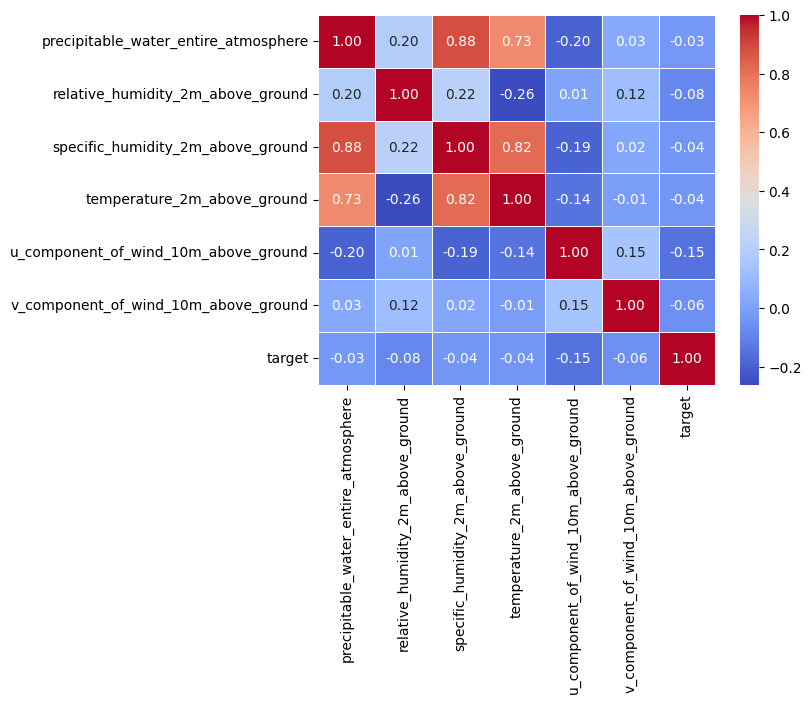

In [4]:
import matplotlib as plt
import seaborn as sns

target = df['target']

df_other['target'] = target

corr_fr = df_other.corr()

# plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_fr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.show()


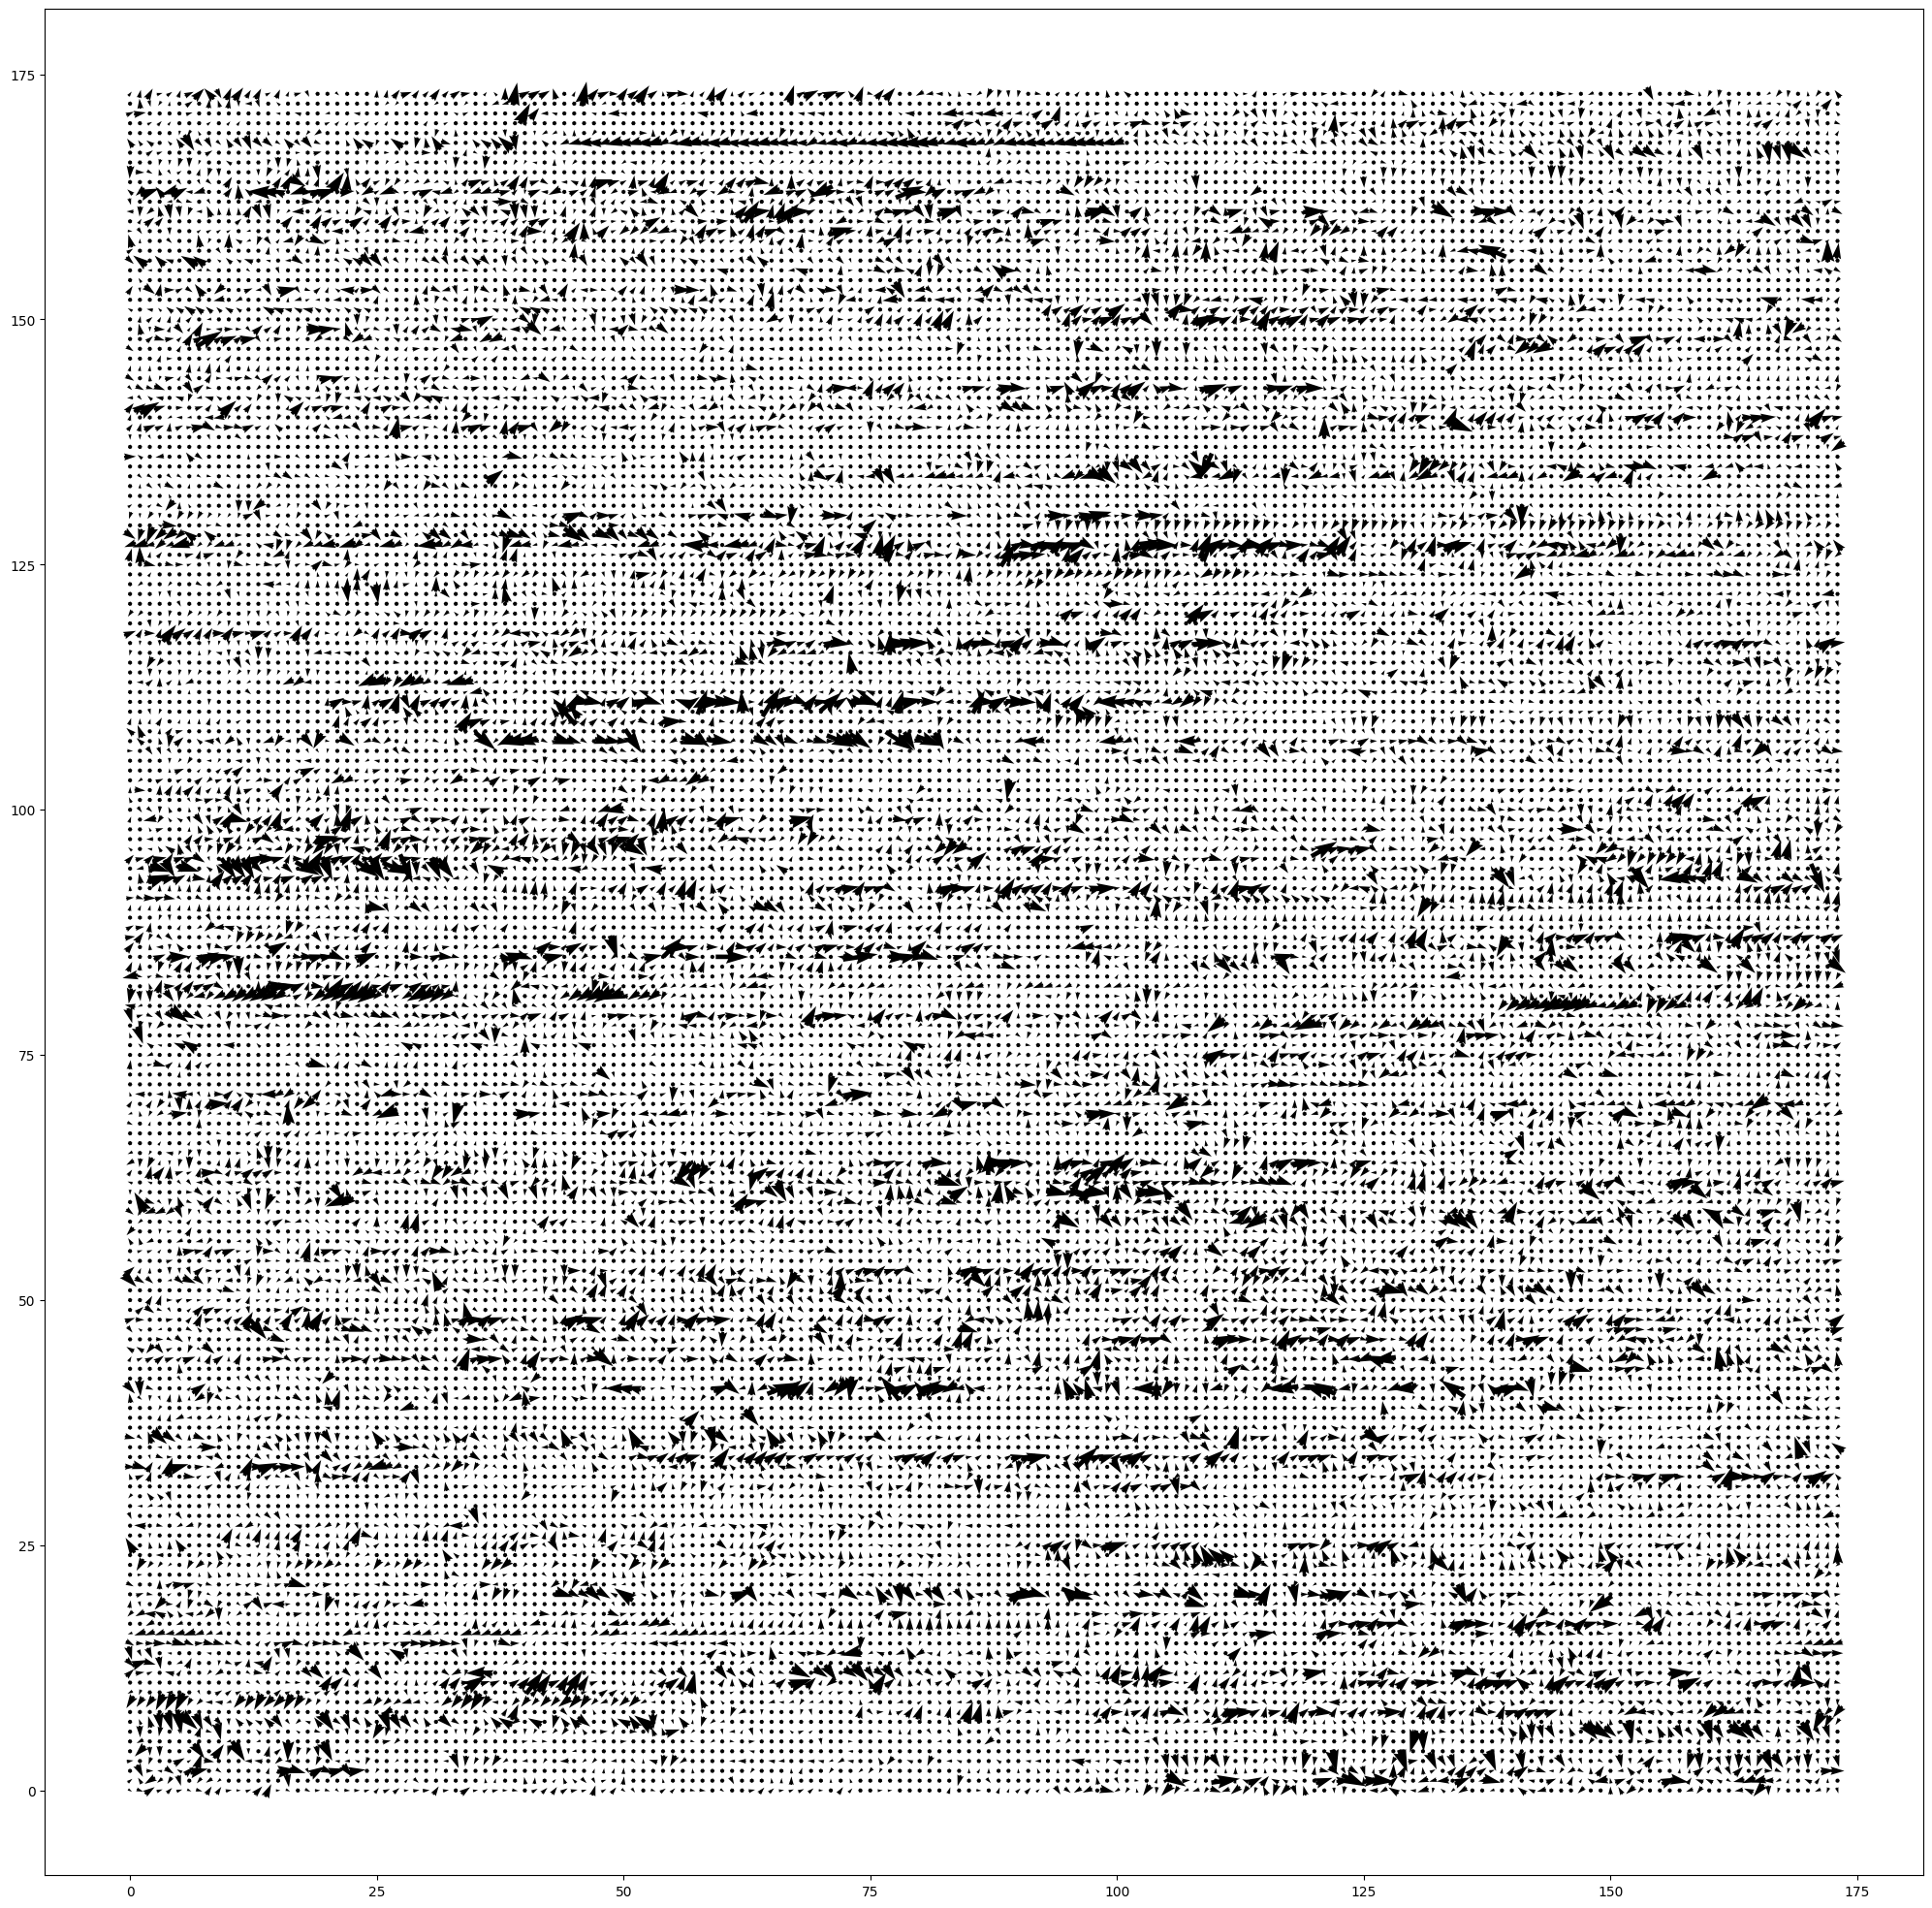

In [16]:
import numpy as np
import iris
import iris.pandas
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt

grid_size = int(np.sqrt(len(df)))
plt.figure(figsize=(25, 25))
cubes = iris.pandas.as_cubes(df.iloc[0:grid_size**2][['u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground']])
uwind_2d = cubes[0].data.reshape(grid_size, grid_size)
vwind_2d = cubes[1].data.reshape(grid_size, grid_size)
uwind_2d_cube = iris.cube.Cube(uwind_2d)
vwind_2d_cube = iris.cube.Cube(vwind_2d)
iplt.quiver(uwind_2d_cube, vwind_2d_cube, pivot="middle")

In [ ]:
import numpy as np

# Reshape the data into a 2D grid (example: 100x100 grid)
grid_size = int(np.sqrt(len(df)))
if grid_size ** 2 != len(df):
    raise ValueError("The number of data points is not a perfect square, cannot reshape into a grid.")

uwind_2d = uwind.data.reshape(grid_size, grid_size)
vwind_2d = vwind.data.reshape(grid_size, grid_size)

# Create new 2D cubes
uwind_2d_cube = iris.cube.Cube(uwind_2d, long_name=uwind.name(), units=uwind.units)
vwind_2d_cube = iris.cube.Cube(vwind_2d, long_name=vwind.name(), units=vwind.units)

# Generate the arrow plot
iplt.quiver(uwind_2d_cube, vwind_2d_cube, pivot="middle")

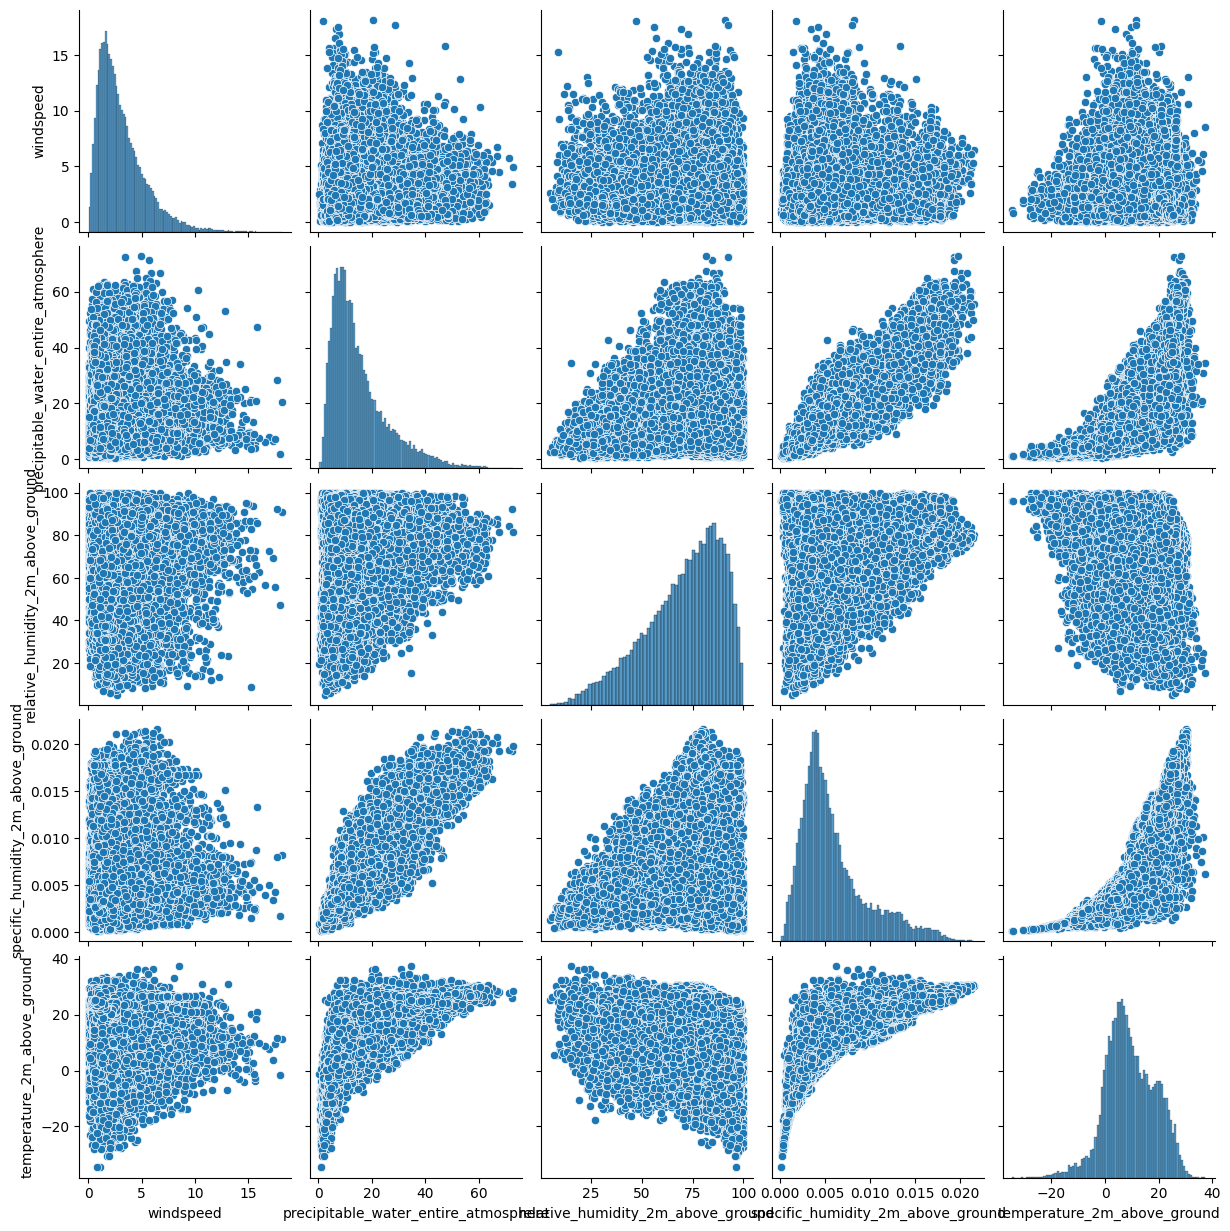

In [24]:
df['windspeed'] = (df['u_component_of_wind_10m_above_ground'] ** 2 + df['v_component_of_wind_10m_above_ground'] ** 2) ** 0.5
df_other = df[['windspeed', 'precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground']]
sns.pairplot(df_other)

<Axes: xlabel='specific_humidity_2m_above_ground', ylabel='windspeed'>

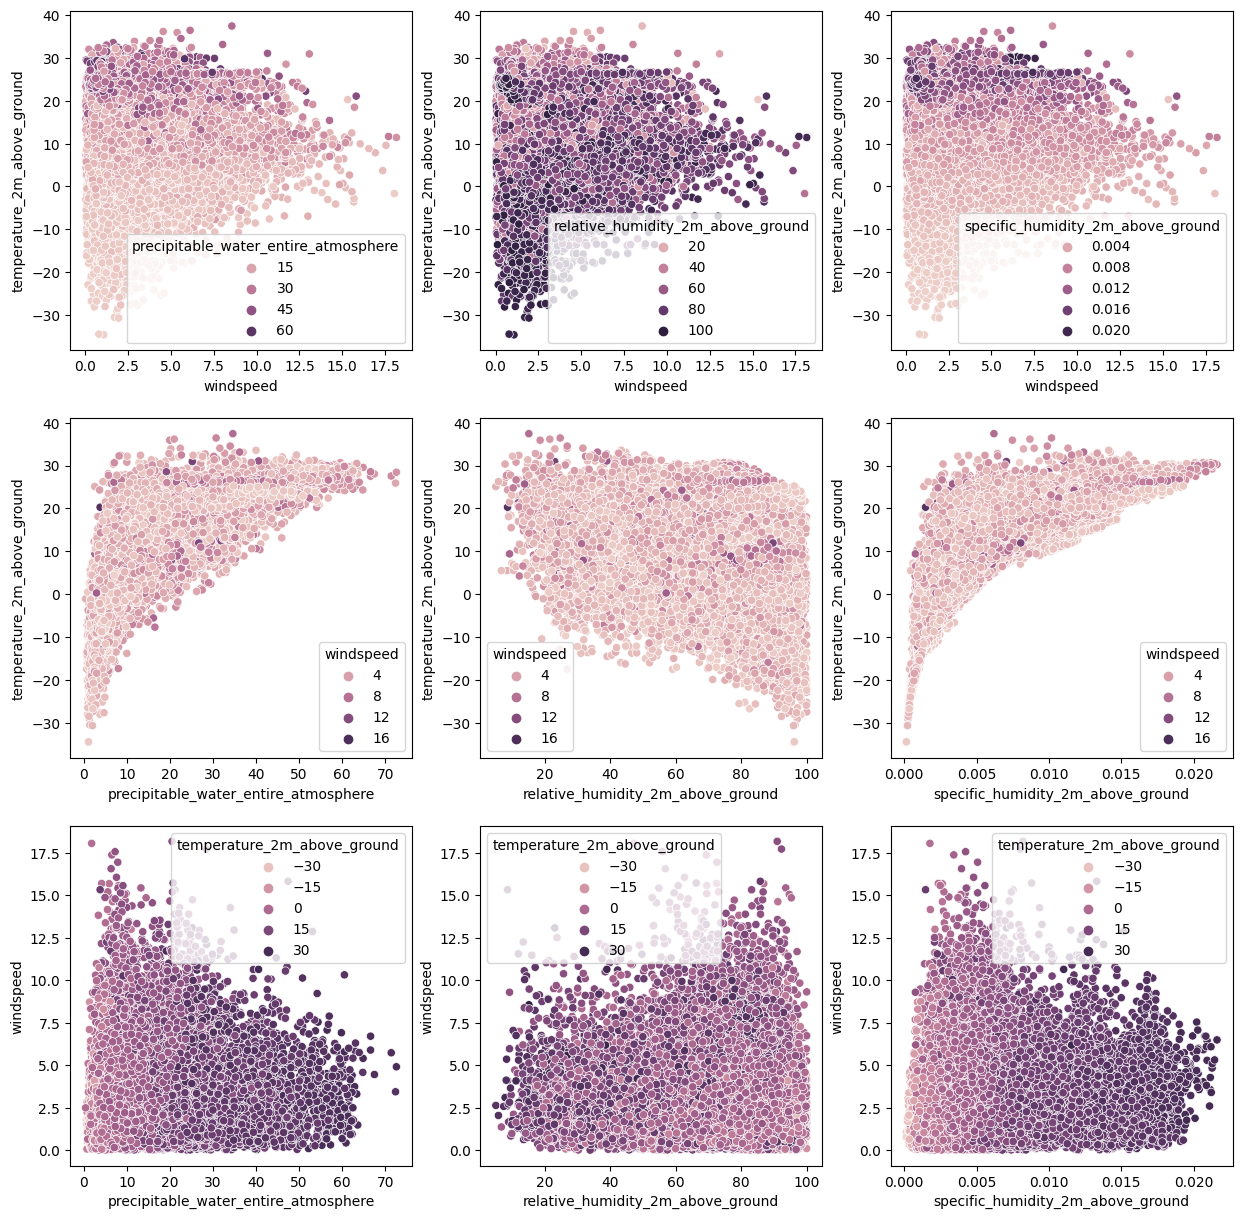

In [29]:
# df_other = df[['windspeed', 'precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground']]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
sns.scatterplot(df, x=df['windspeed'], y=df['temperature_2m_above_ground'], hue=df['precipitable_water_entire_atmosphere'], ax=axes[0][0])
sns.scatterplot(df, x=df['windspeed'], y=df['temperature_2m_above_ground'], hue=df['relative_humidity_2m_above_ground'], ax=axes[0][1])
sns.scatterplot(df, x=df['windspeed'], y=df['temperature_2m_above_ground'], hue=df['specific_humidity_2m_above_ground'], ax=axes[0][2])

sns.scatterplot(df, hue=df['windspeed'], y=df['temperature_2m_above_ground'], x=df['precipitable_water_entire_atmosphere'], ax=axes[1][0])
sns.scatterplot(df, hue=df['windspeed'], y=df['temperature_2m_above_ground'], x=df['relative_humidity_2m_above_ground'], ax=axes[1][1])
sns.scatterplot(df, hue=df['windspeed'], y=df['temperature_2m_above_ground'], x=df['specific_humidity_2m_above_ground'], ax=axes[1][2])

sns.scatterplot(df, y=df['windspeed'], hue=df['temperature_2m_above_ground'], x=df['precipitable_water_entire_atmosphere'], ax=axes[2][0])
sns.scatterplot(df, y=df['windspeed'], hue=df['temperature_2m_above_ground'], x=df['relative_humidity_2m_above_ground'], ax=axes[2][1])
sns.scatterplot(df, y=df['windspeed'], hue=df['temperature_2m_above_ground'], x=df['specific_humidity_2m_above_ground'], ax=axes[2][2])